In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint, sample
from scipy.interpolate import interp1d
from pickle import dump, load

woi = "preseizure1"

from google.colab import drive
drive.mount('/content/gdrive')
main_folder = "/content/gdrive/My Drive/epigame-folder/game_vKarla/"

# main_folder = "/media/kivi/ADATA HV100/epigame-folder/game_vKarla"

Mounted at /content/gdrive


In [2]:
conn_measures = ['PAC', 'SCR-(0,4)', 'SCI-(0,4)', 'PLV-(0,4)', 'PLI-(0,4)', 'CC-(0,4)', 'SCR-(4,8)', 'SCI-(4,8)', 'PLV-(4,8)', 'PLI-(4,8)', 'CC-(4,8)', 'SCR-(8,13)', 'SCI-(8,13)', 'PLV-(8,13)', 'PLI-(8,13)', 'CC-(8,13)', 'SCR-(13,30)', 'SCI-(13,30)', 'PLV-(13,30)', 'PLI-(13,30)', 'CC-(13,30)', 'SCR-(30,70)', 'SCI-(30,70)', 'PLV-(30,70)', 'PLI-(30,70)', 'CC-(30,70)', 'SCR-(70,150)', 'SCI-(70,150)', 'PLV-(70,150)', 'PLI-(70,150)', 'CC-(70,150)']

Connectivity: PAC
The AUC is: 0.4693877551020409


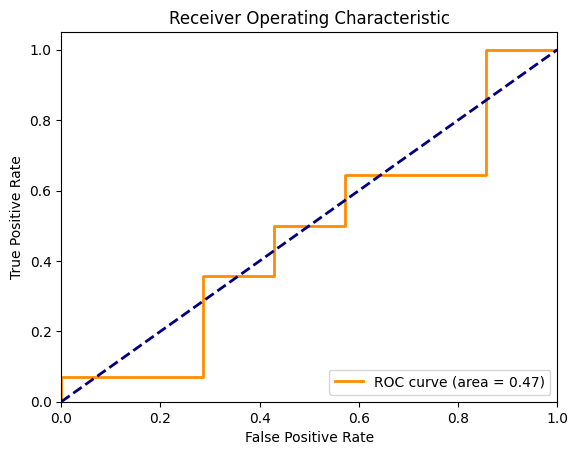

Connectivity: SCR-(0,4)
The AUC is: 0.6734693877551021


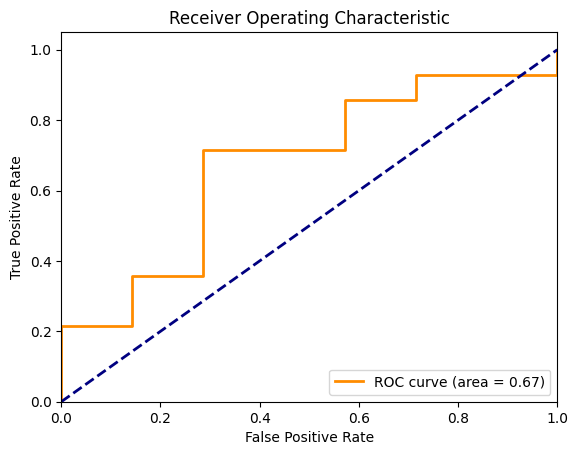

Connectivity: SCI-(0,4)
The AUC is: 0.5816326530612246


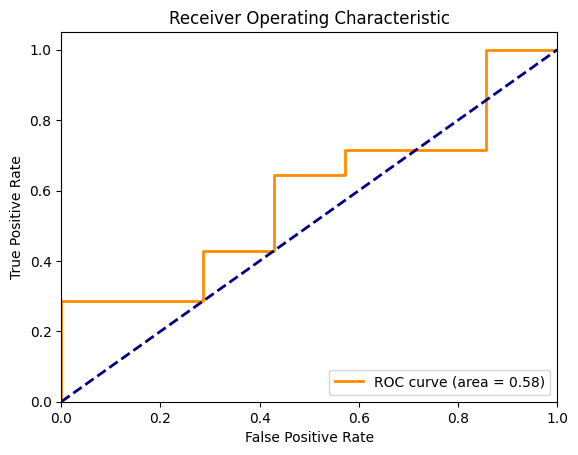

Connectivity: PLV-(0,4)
The AUC is: 0.7857142857142857


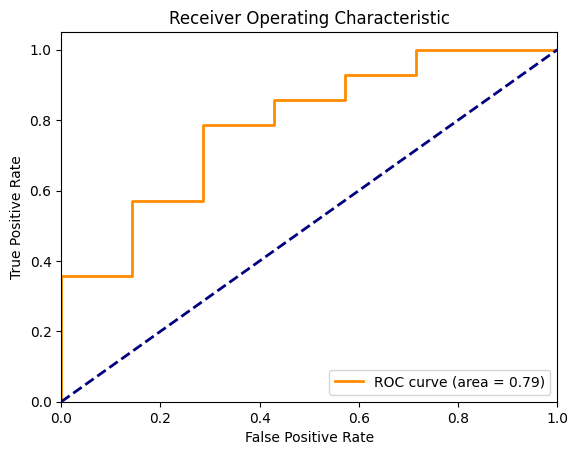

Connectivity: PLI-(0,4)
The AUC is: 0.5816326530612245


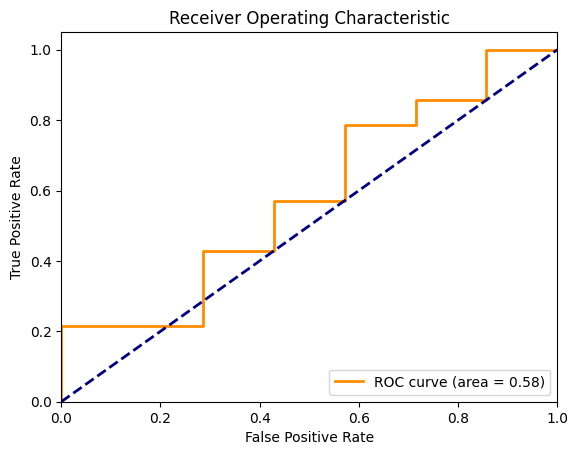

Connectivity: CC-(0,4)
The AUC is: 0.4693877551020408


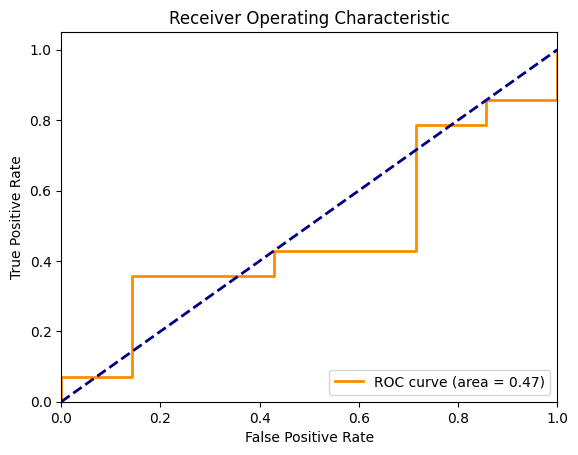

Connectivity: SCR-(4,8)
The AUC is: 0.336734693877551


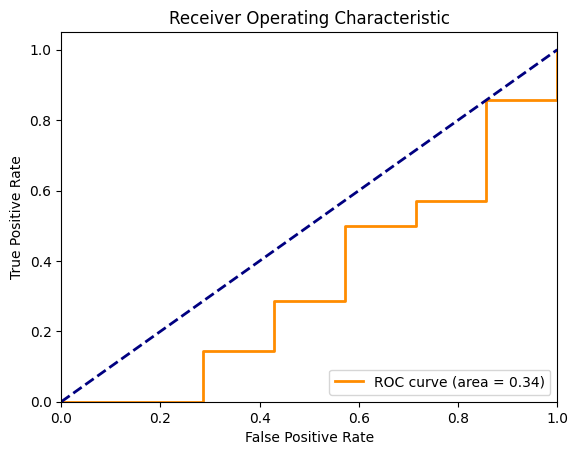

Connectivity: SCI-(4,8)
The AUC is: 0.4897959183673469


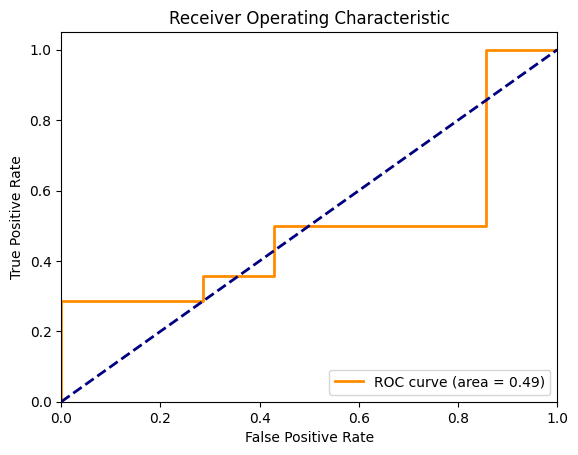

Connectivity: PLV-(4,8)
The AUC is: 0.673469387755102


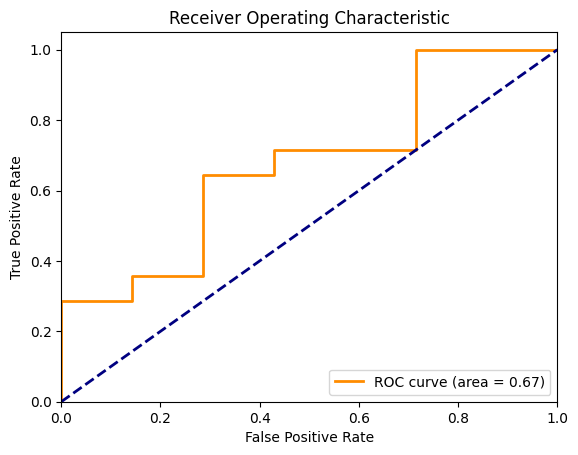

Connectivity: PLI-(4,8)
The AUC is: 0.8163265306122449


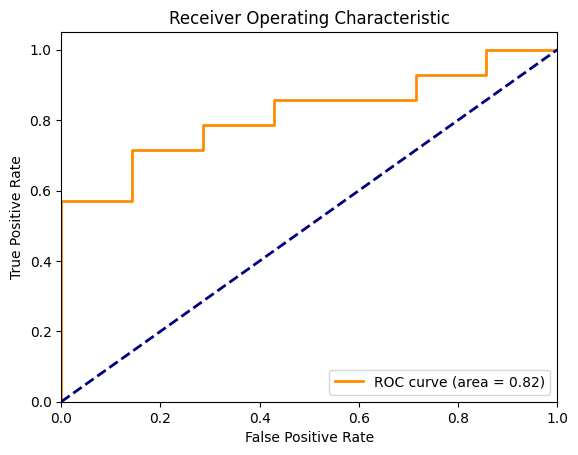

Connectivity: CC-(4,8)
The AUC is: 0.41836734693877553


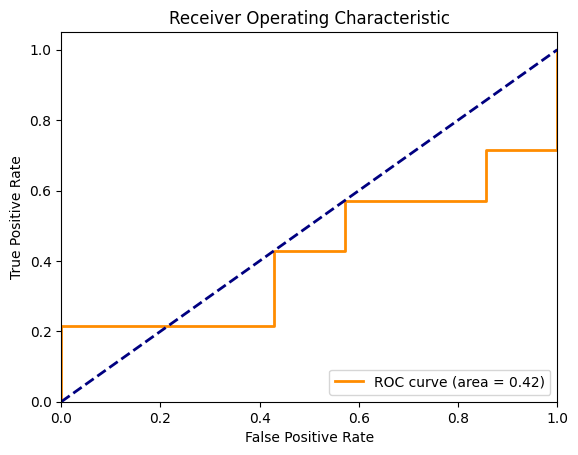

Connectivity: SCR-(8,13)
The AUC is: 0.6938775510204082


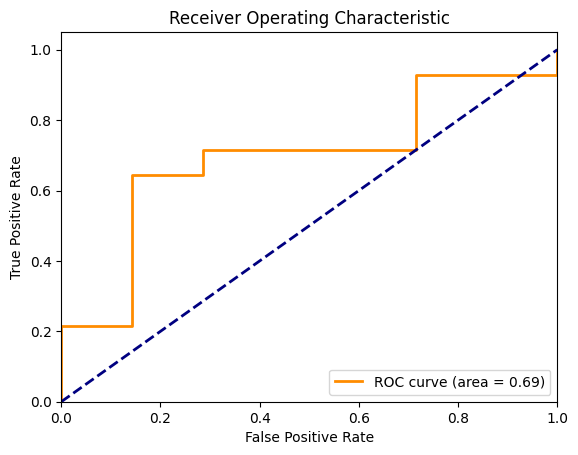

Connectivity: SCI-(8,13)
The AUC is: 0.5612244897959183


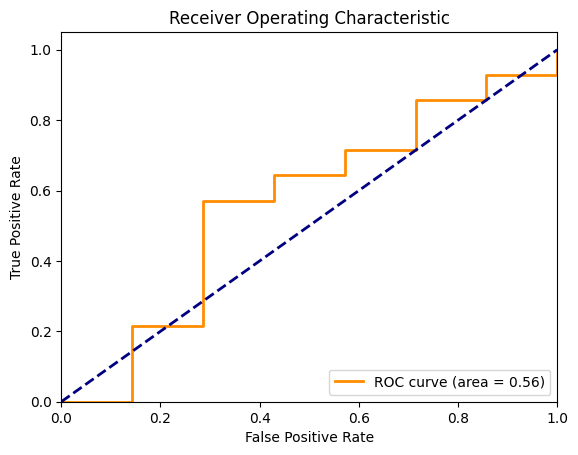

Connectivity: PLV-(8,13)
The AUC is: 0.5918367346938775


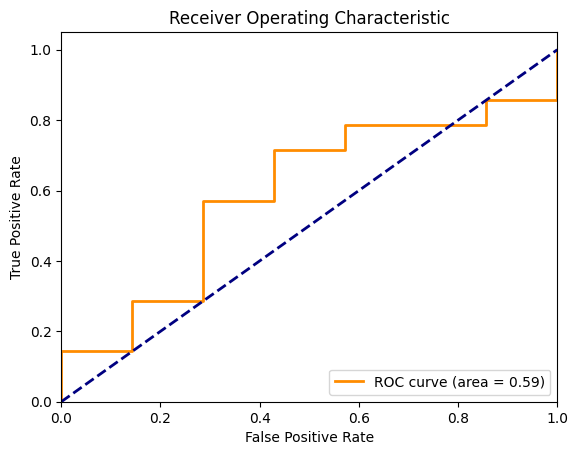

Connectivity: PLI-(8,13)
The AUC is: 0.47959183673469385


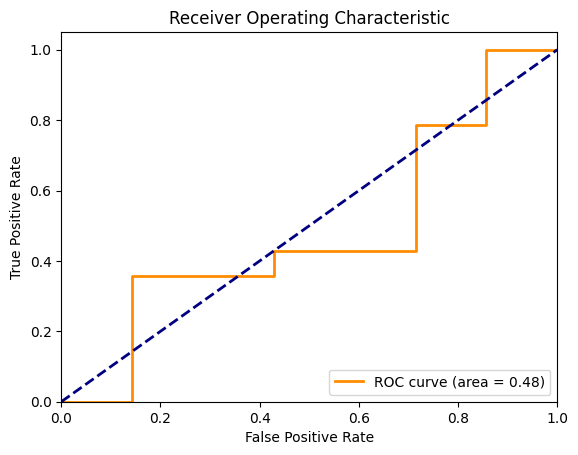

Connectivity: CC-(8,13)
The AUC is: 0.2755102040816327


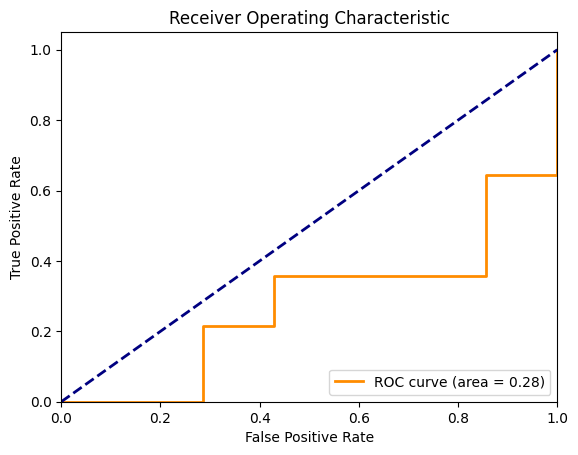

Connectivity: SCR-(13,30)
The AUC is: 0.7448979591836735


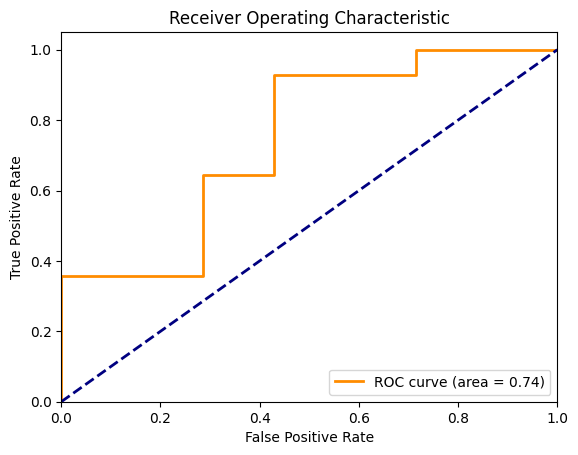

Connectivity: SCI-(13,30)
The AUC is: 0.5


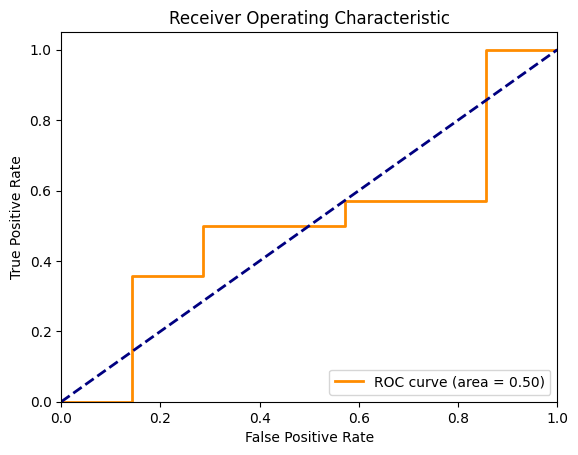

Connectivity: PLV-(13,30)
The AUC is: 0.44897959183673475


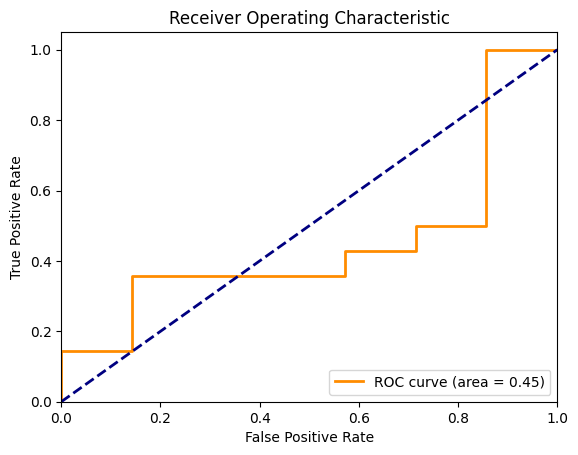

Connectivity: PLI-(13,30)
The AUC is: 0.40816326530612246


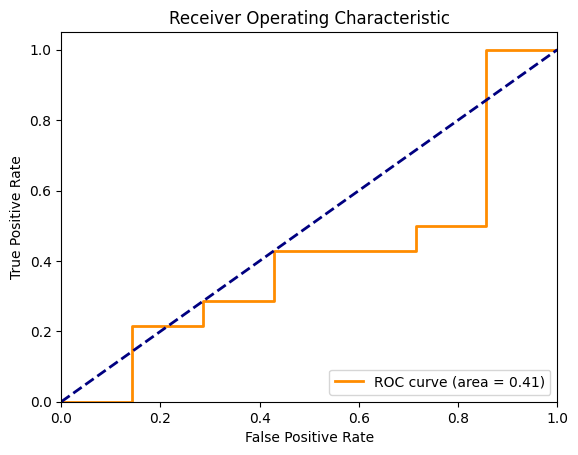

Connectivity: CC-(13,30)
The AUC is: 0.326530612244898


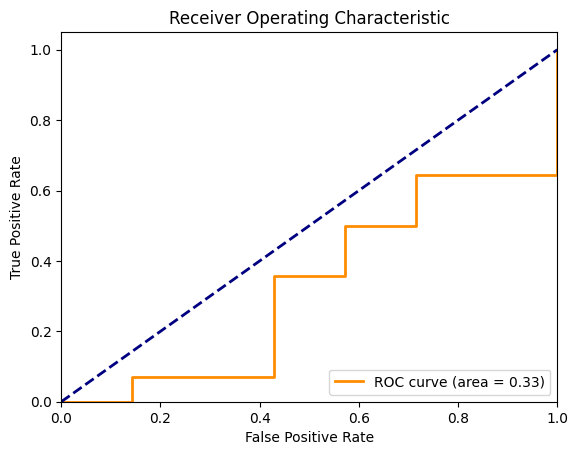

Connectivity: SCR-(30,70)
The AUC is: 0.6530612244897959


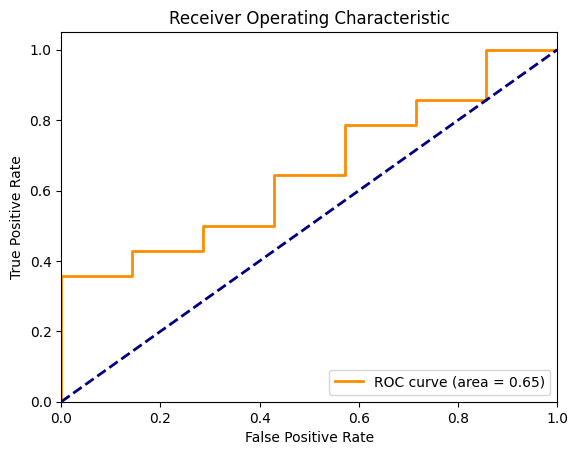

Connectivity: SCI-(30,70)
The AUC is: 0.5204081632653061


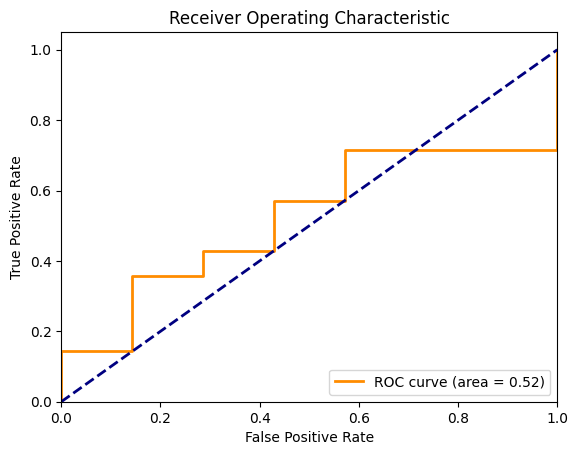

Connectivity: PLV-(30,70)
The AUC is: 0.653061224489796


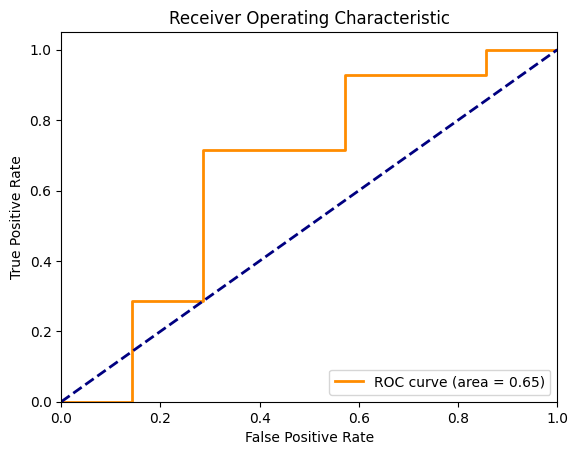

Connectivity: PLI-(30,70)
The AUC is: 0.5102040816326531


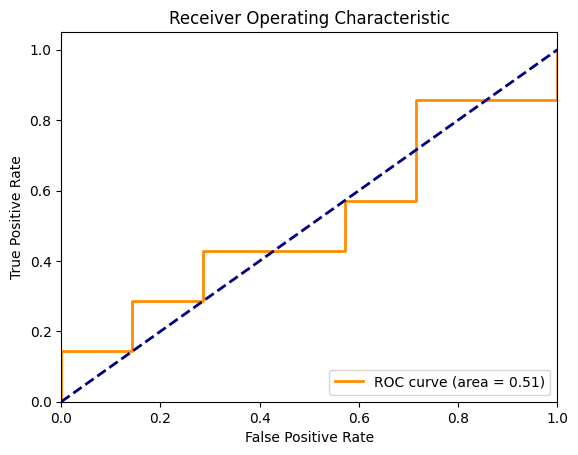

Connectivity: CC-(30,70)
The AUC is: 0.510204081632653


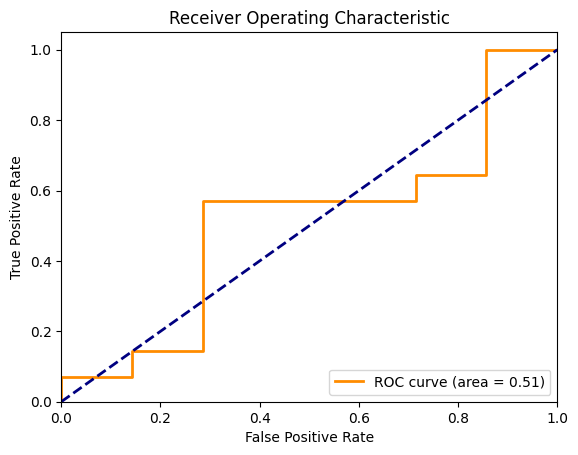

Connectivity: SCR-(70,150)
The AUC is: 0.22448979591836737


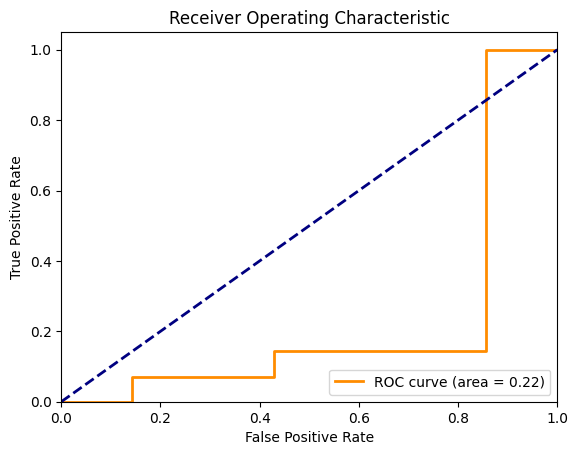

Connectivity: SCI-(70,150)
The AUC is: 0.4693877551020408


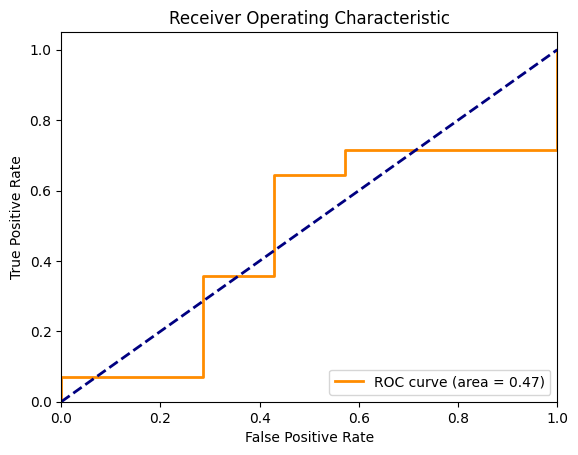

Connectivity: PLV-(70,150)
The AUC is: 0.30612244897959184


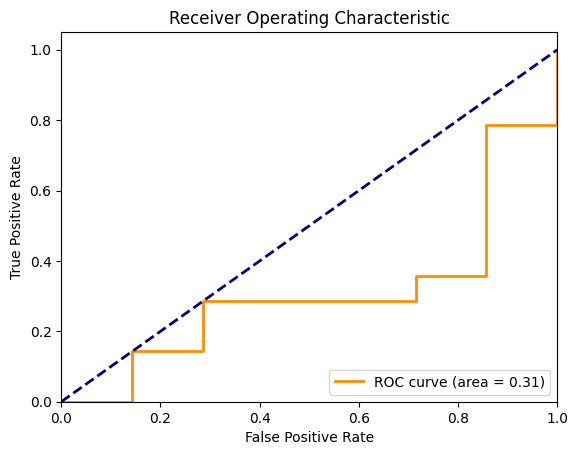

Connectivity: PLI-(70,150)
The AUC is: 0.826530612244898


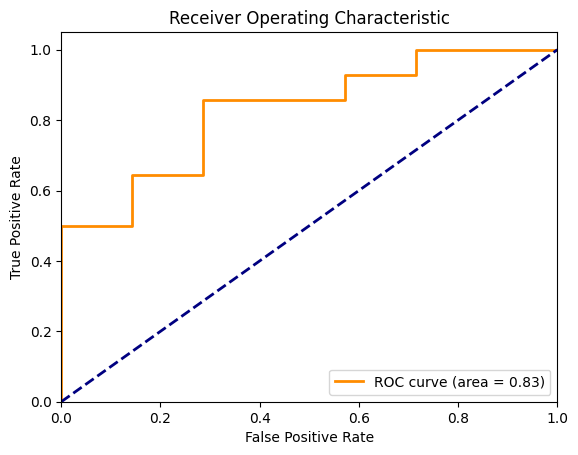

Connectivity: CC-(70,150)
The AUC is: 0.4387755102040817


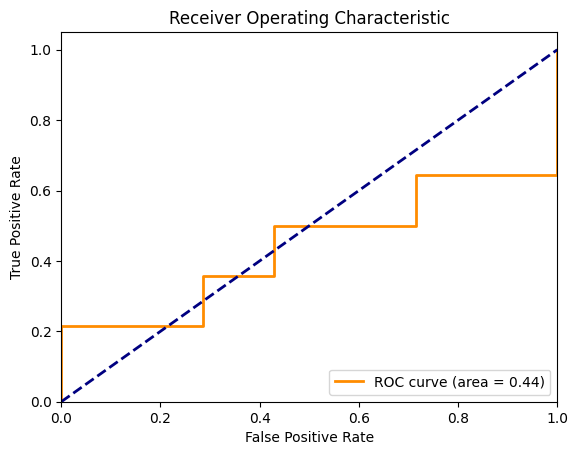

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

sigma = 2
summary_stat = "mm"


load_data = pd.read_excel(main_folder+f"surgical_outcome_data_{sigma}sigma.xlsx", engine='openpyxl')
load_data["Mean_overlap_ratio"].fillna(0, inplace=True) # if 0 winners, nan is saved, so replace it with 0

for cm in conn_measures:
  print(f"Connectivity: {cm}")
  data = load_data.groupby("CM").get_group(cm).groupby("Strategy").get_group(summary_stat)
  # print(data.dtypes)

  scores, actual_labels = list(data.Mean_overlap_ratio), list(data.Outcome)


  # Calculate the ROC curve
  fpr, tpr, thresholds = roc_curve(actual_labels, scores)

  # Calculate the AUC
  roc_auc = auc(fpr, tpr)

  # Print the AUC
  print(f'The AUC is: {roc_auc}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

The code below checks if there are any zero Mean_overlap_ratio in the data. If yes, it fetches the value from the same index in the previous sigma file (sigma-1) and continues with the analysis. If a zero is found in row `zero_row_index` in the current sigma file, it replaces the corresponding value with the one from the previous sigma file.


In [9]:
!pip install statannot

import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
from scipy.stats import shapiro, mannwhitneyu, ttest_ind
from itertools import combinations

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
import matplotlib.pyplot as plt

  Using cached statannot-0.2.3-py3-none-any.whl (10 kB)


In [11]:
sigma = 4
while sigma > 0:
    load_data = pd.read_excel(main_folder + f"surgical_outcome_data_{sigma}sigma.xlsx", engine='openpyxl')

    # Check if "Mean_overlap_ratio" contains any zeros
    zero_row_indices = load_data.index[load_data["Mean_overlap_ratio"] == 0].tolist()

    if zero_row_indices:
        print(f"Zeros found in rows {zero_row_indices} for sigma={sigma}")
        if sigma == 1:
            print("Skipping iteration for sigma=1 with zeros")
            break

        sigma -= 1
        prev_load_data = pd.read_excel(main_folder + f"surgical_outcome_data_{sigma}sigma.xlsx", engine='openpyxl')

        for zero_row_index in zero_row_indices:
            zero_value = prev_load_data.loc[zero_row_index, "Mean_overlap_ratio"]
            load_data.loc[zero_row_index, "Mean_overlap_ratio"] = zero_value
    else:
        break  # No zeros found, exit the loop



Zeros found in rows [100, 101, 103, 104, 107, 108, 110, 113, 115, 118, 119, 121, 122, 123, 149, 154, 248, 253, 254, 256, 257, 258, 259, 261, 263, 268, 273, 278, 295, 403, 407, 408, 409, 410, 412, 413, 415, 422, 423, 427, 428, 429, 431, 432, 433, 439, 440, 454, 558, 566, 568, 569, 570, 572, 573, 576, 578, 579, 580, 581, 583, 584, 588, 599, 600, 606, 609, 665, 714, 721, 730, 732, 734, 736, 737, 741, 742, 743, 754, 765, 766, 814, 853, 857, 860, 868, 869, 870, 872, 873, 874, 875, 876, 877, 878, 879, 881, 882, 883, 884, 885, 886, 888, 889, 890, 892, 893, 894, 895, 897, 898, 902, 907, 908, 909, 916, 919, 920, 925, 929, 1023, 1029, 1030, 1033, 1034, 1036, 1038, 1040, 1043, 1048, 1051, 1052, 1053, 1178, 1180, 1185, 1187, 1188, 1193, 1195, 1196, 1198, 1199, 1201, 1202, 1203, 1204, 1206, 1208, 1234, 1236, 1239, 1297, 1333, 1339, 1341, 1343, 1348, 1353, 1358, 1359, 1360, 1363, 1385, 1495, 1496, 1497, 1498, 1503, 1505, 1510, 1512, 1513, 1514, 1515, 1517, 1518, 1530, 1533, 1643, 1645, 1648, 1649, 1

Connectivity: PAC
The AUC is: 0.47959183673469385


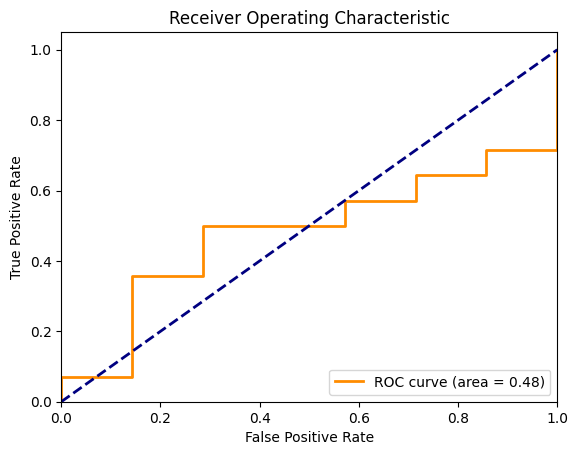

Connectivity: SCR-(0,4)
The AUC is: 0.7755102040816326


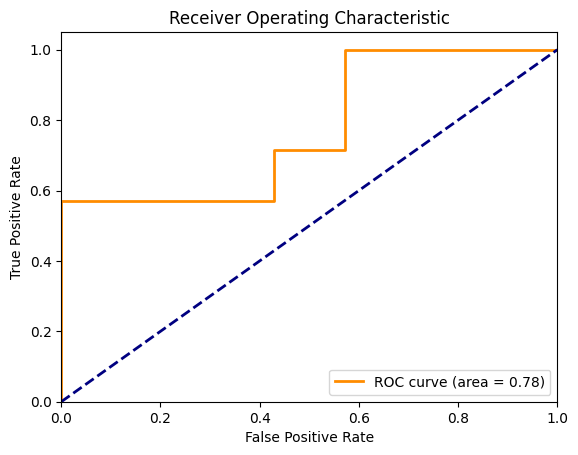

Connectivity: SCI-(0,4)
The AUC is: 0.7448979591836735


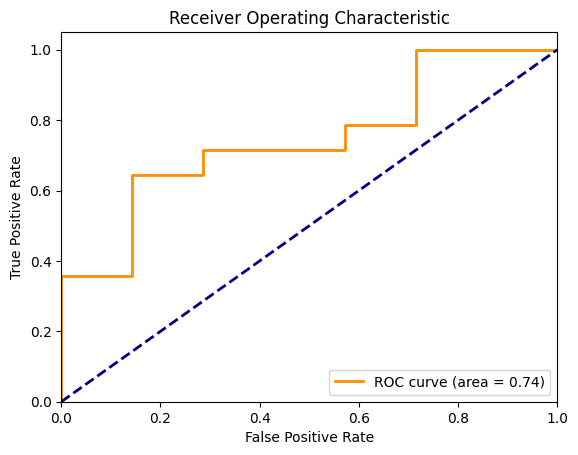

Connectivity: PLV-(0,4)
The AUC is: 0.7142857142857143


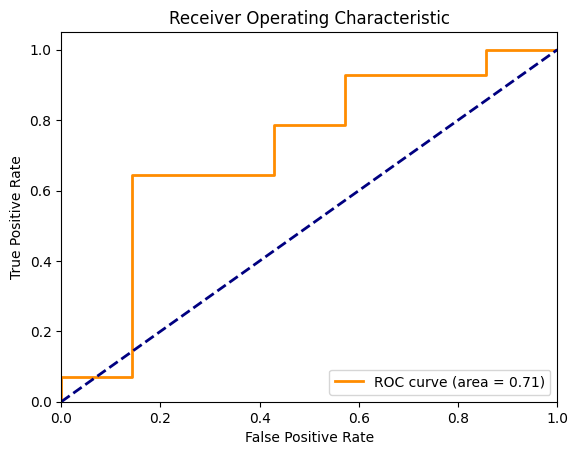

Connectivity: PLI-(0,4)
The AUC is: 0.45918367346938777


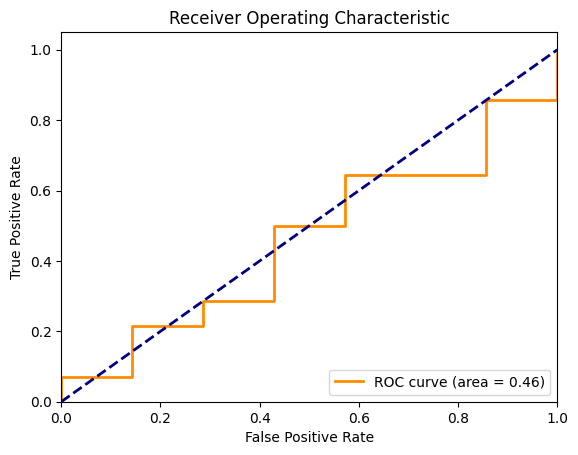

Connectivity: CC-(0,4)
The AUC is: 0.3163265306122449


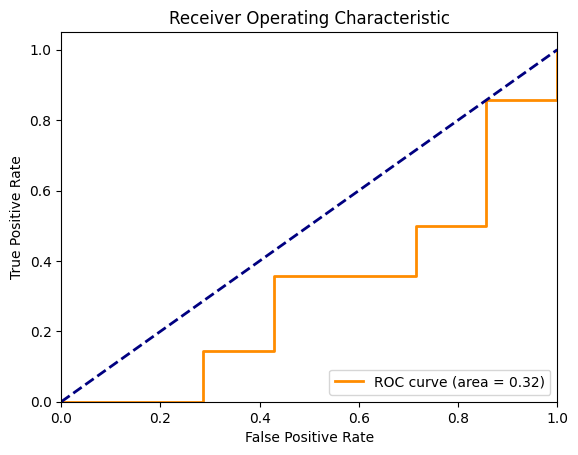

Connectivity: SCR-(4,8)
The AUC is: 0.29591836734693877


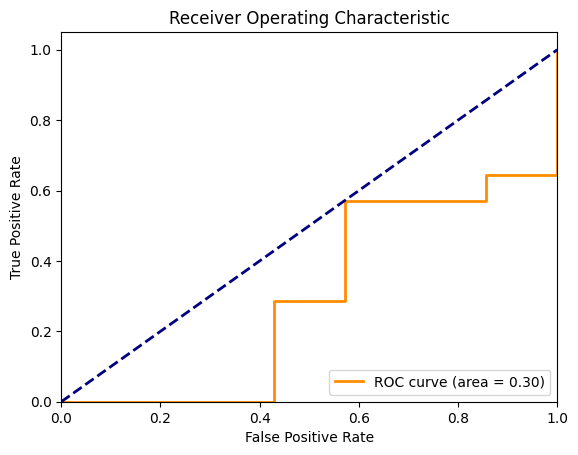

Connectivity: SCI-(4,8)
The AUC is: 0.4693877551020408


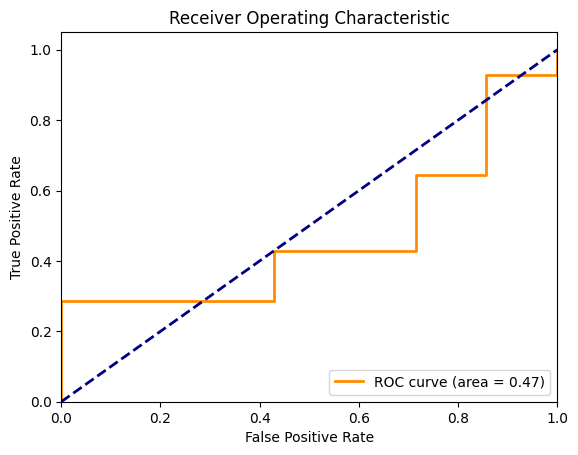

Connectivity: PLV-(4,8)
The AUC is: 0.7040816326530612


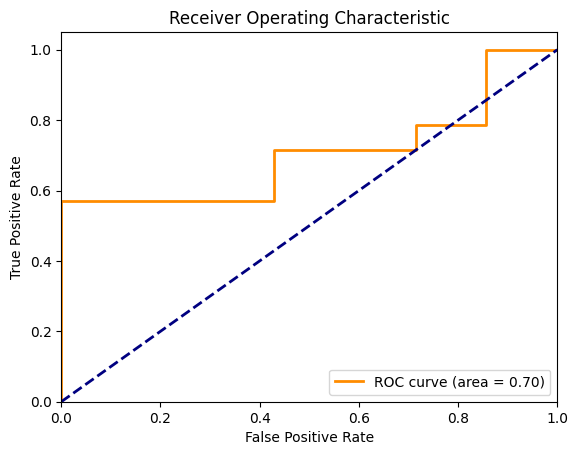

Connectivity: PLI-(4,8)
The AUC is: 0.9183673469387754


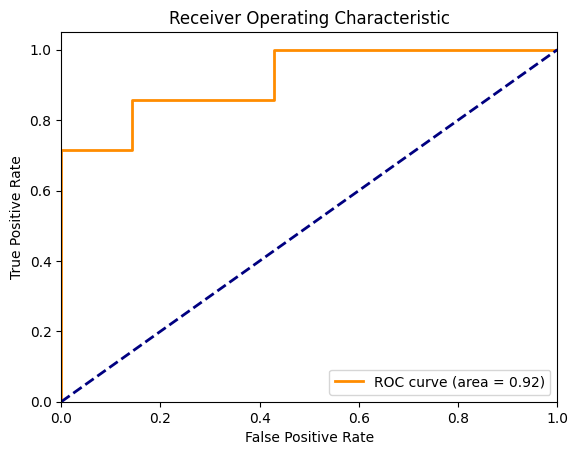

Connectivity: CC-(4,8)
The AUC is: 0.5510204081632653


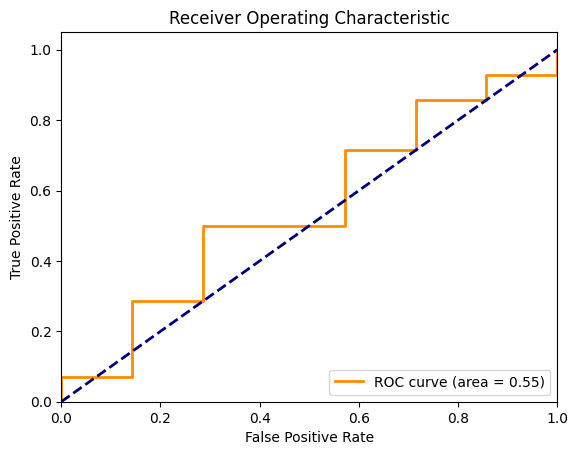

Connectivity: SCR-(8,13)
The AUC is: 0.6326530612244898


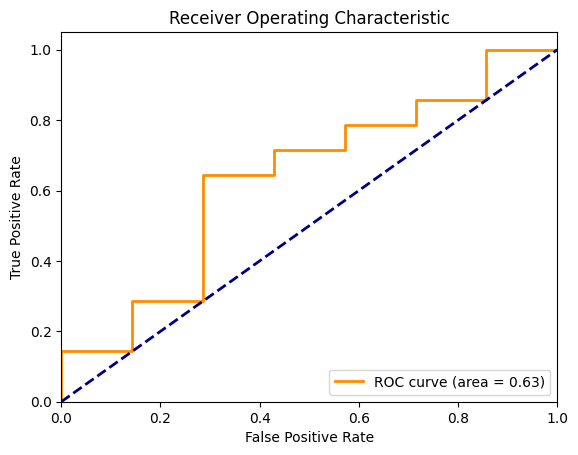

Connectivity: SCI-(8,13)
The AUC is: 0.5


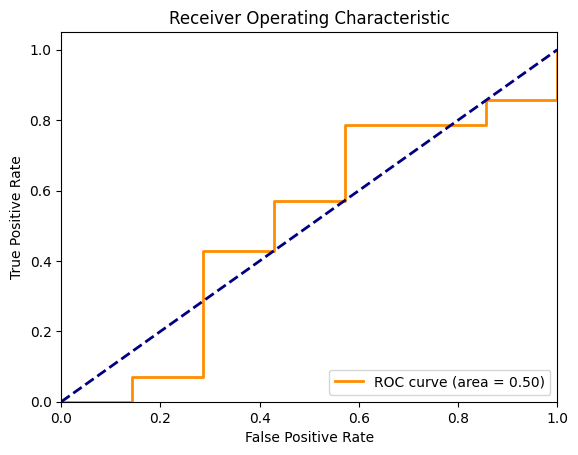

Connectivity: PLV-(8,13)
The AUC is: 0.3673469387755102


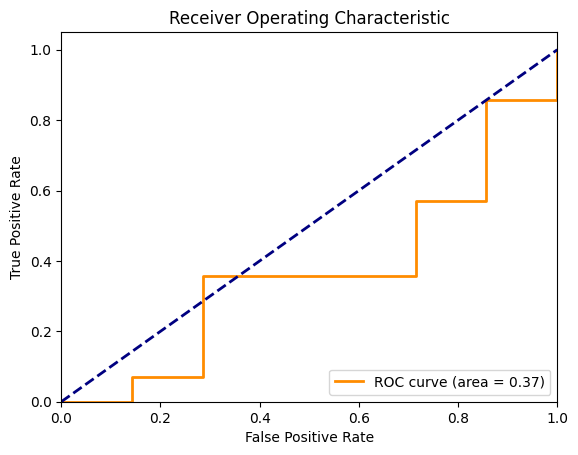

Connectivity: PLI-(8,13)
The AUC is: 0.5612244897959183


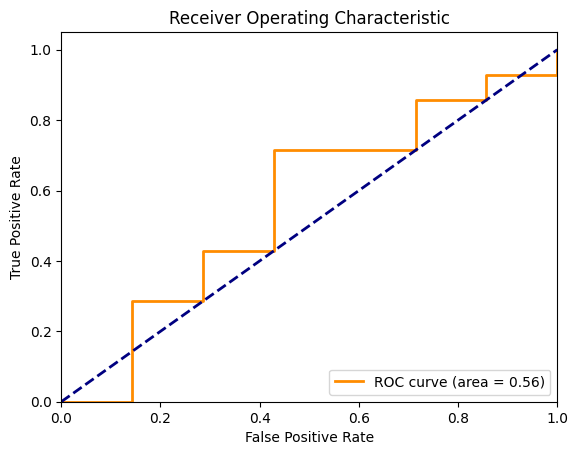

Connectivity: CC-(8,13)
The AUC is: 0.4387755102040817


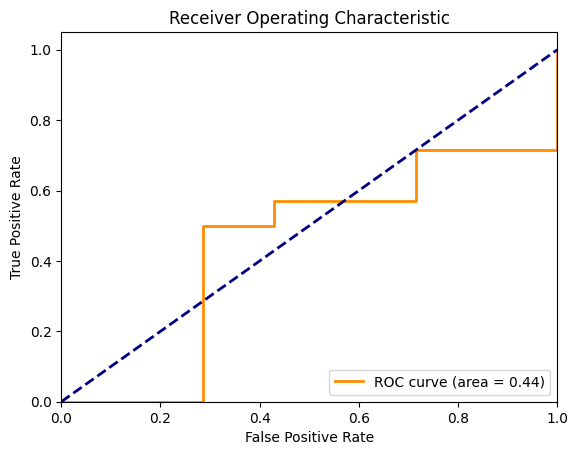

Connectivity: SCR-(13,30)
The AUC is: 0.5408163265306123


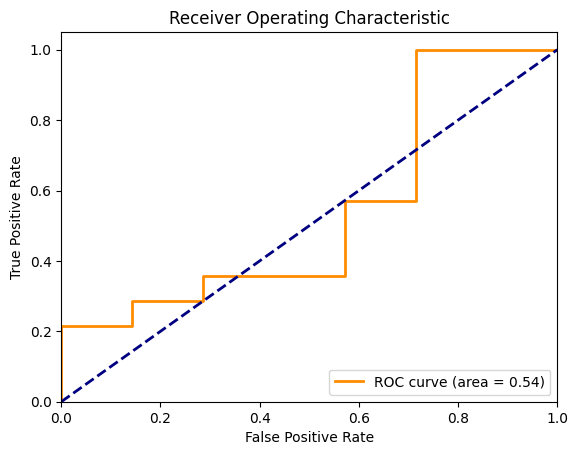

Connectivity: SCI-(13,30)
The AUC is: 0.4795918367346939


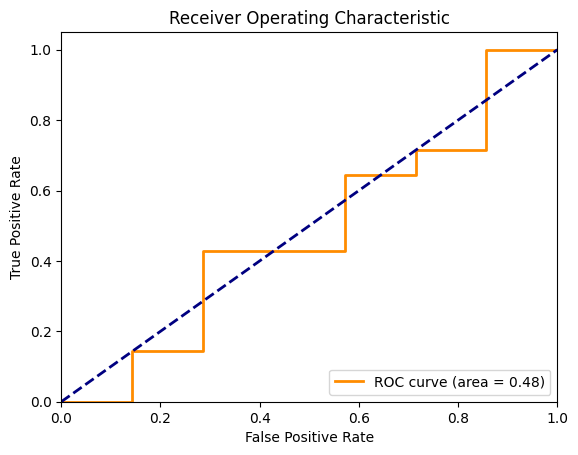

Connectivity: PLV-(13,30)
The AUC is: 0.5408163265306123


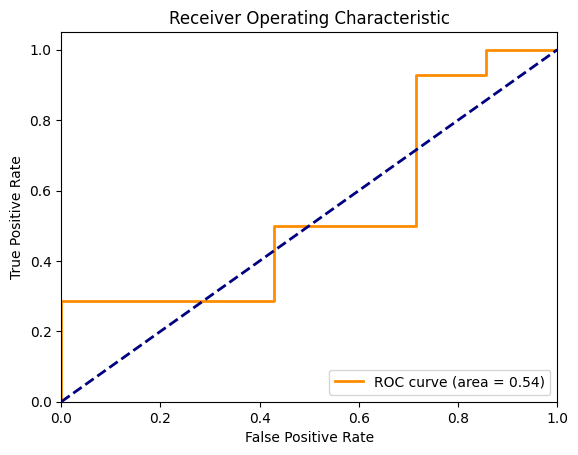

Connectivity: PLI-(13,30)
The AUC is: 0.5204081632653061


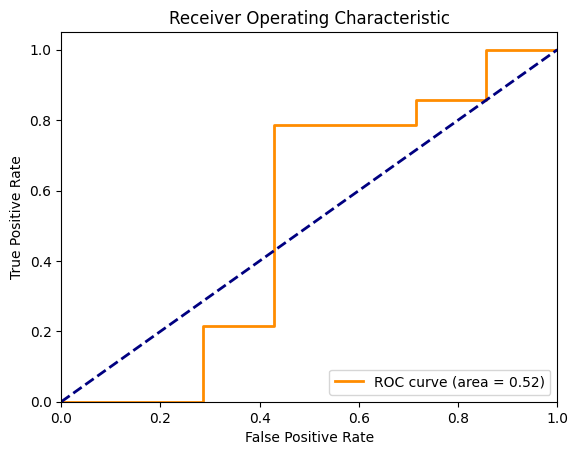

Connectivity: CC-(13,30)
The AUC is: 0.33673469387755106


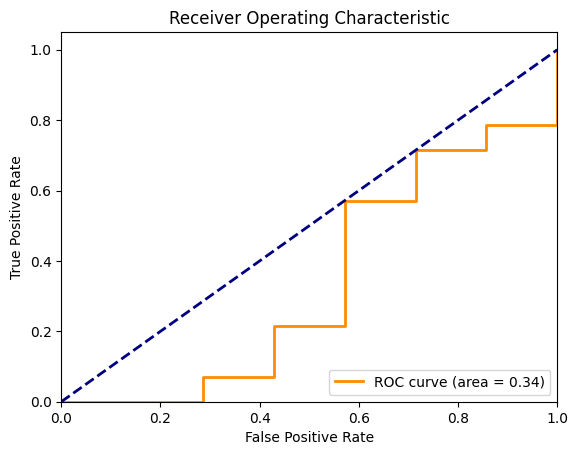

Connectivity: SCR-(30,70)
The AUC is: 0.6224489795918368


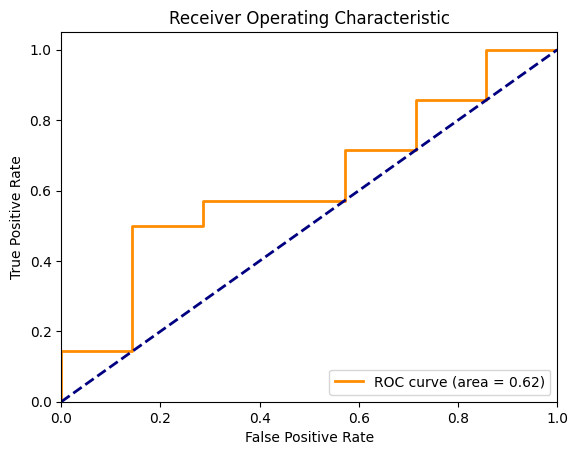

Connectivity: SCI-(30,70)
The AUC is: 0.5204081632653061


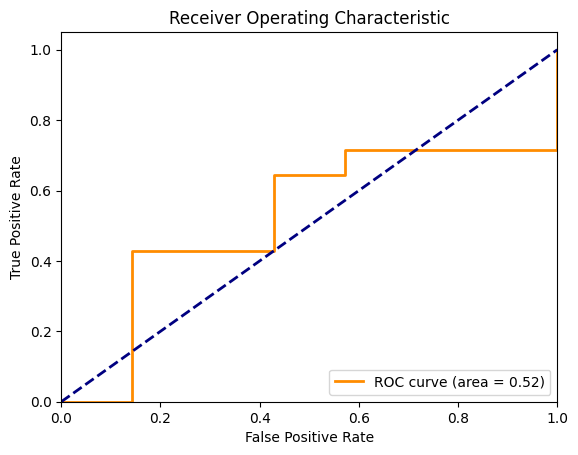

Connectivity: PLV-(30,70)
The AUC is: 0.5306122448979592


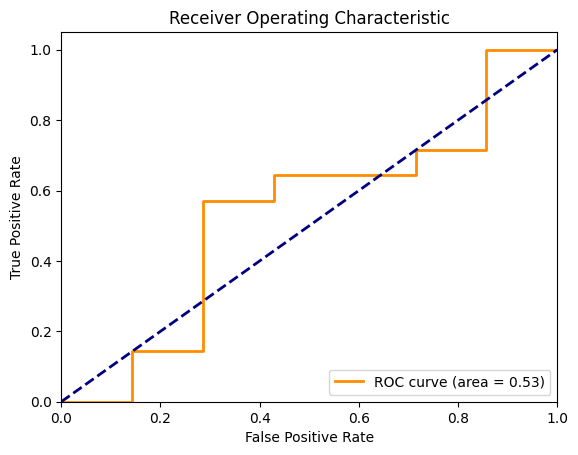

Connectivity: PLI-(30,70)
The AUC is: 0.5


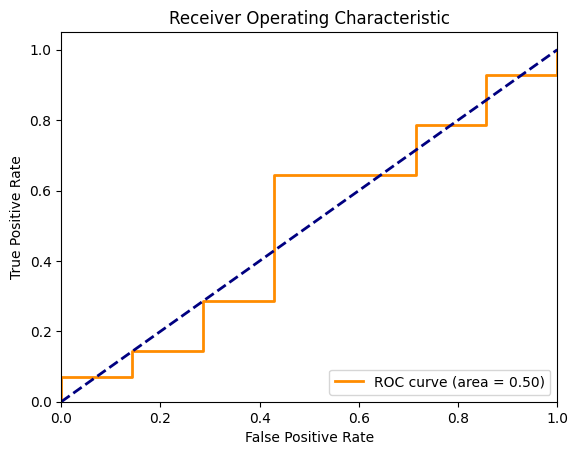

Connectivity: CC-(30,70)
The AUC is: 0.5306122448979591


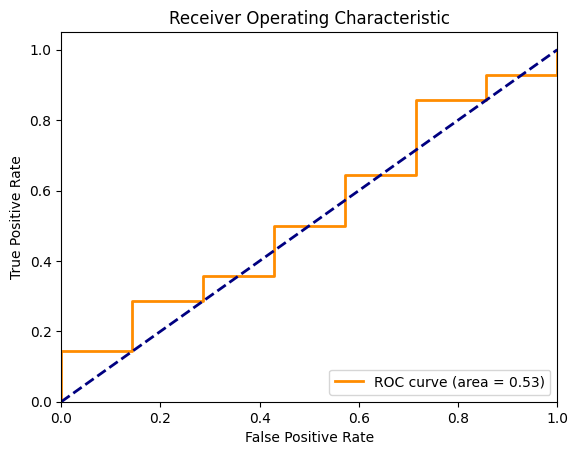

Connectivity: SCR-(70,150)
The AUC is: 0.3163265306122449


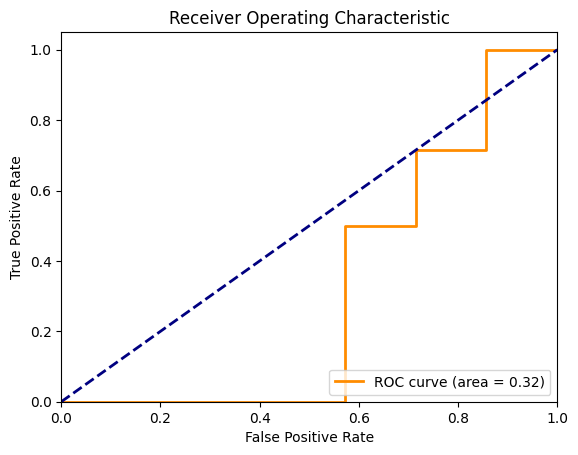

Connectivity: SCI-(70,150)
The AUC is: 0.35714285714285715


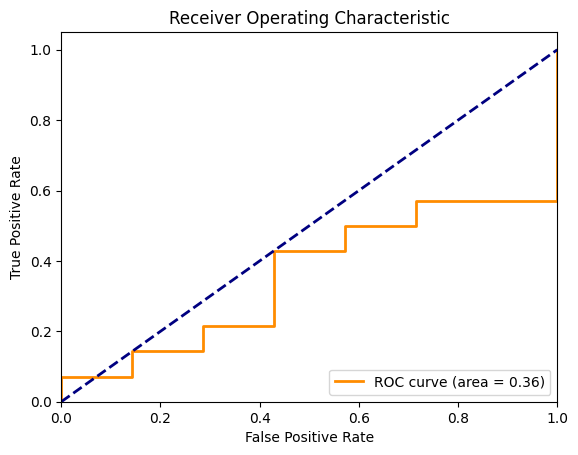

Connectivity: PLV-(70,150)
The AUC is: 0.3163265306122449


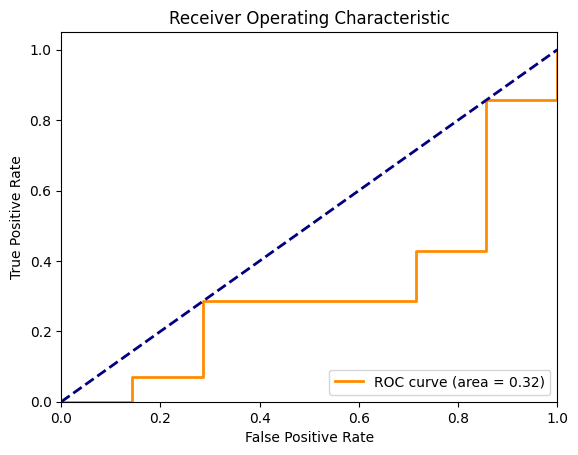

Connectivity: PLI-(70,150)
The AUC is: 0.5


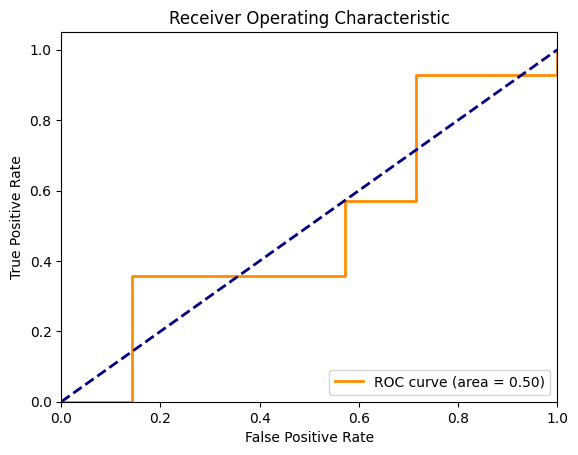

Connectivity: CC-(70,150)
The AUC is: 0.3979591836734694


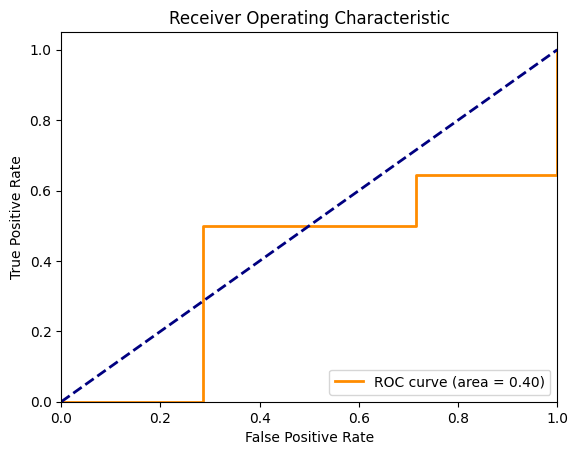

In [12]:
CM, Summary_stat, Gauss, Pvalue_Shapiro, Test, Pvalue, MAUC, T, TN, TP = [], [], [], [], [], [], [], [], [], []

for cm in conn_measures:
    print(f"Connectivity: {cm}")
    data = load_data.groupby("CM").get_group(cm).groupby("Strategy").get_group(summary_stat)
    # print(data.dtypes)

    scores, actual_labels = list(data.Mean_overlap_ratio), list(data.Outcome)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(actual_labels, scores)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Print the AUC
    print(f'The AUC is: {roc_auc}')

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    plt.close('all')

Combinations of 2 connectivity measures.

SCR-(0,4) SCI-(0,4)


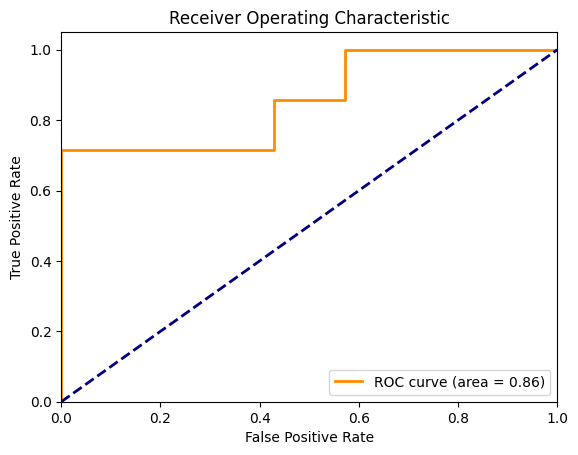

SCR-(0,4) PLV-(0,4)


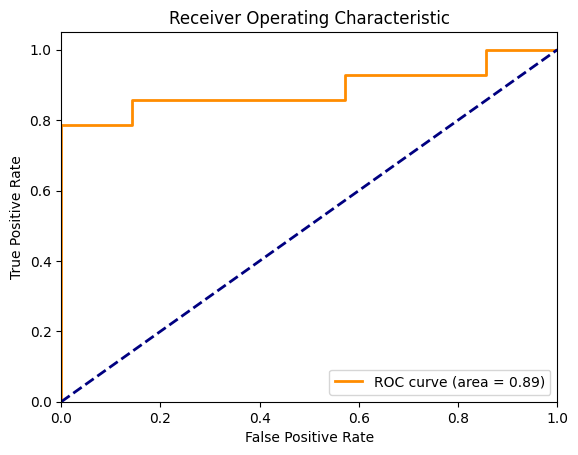

SCR-(0,4) PLV-(4,8)


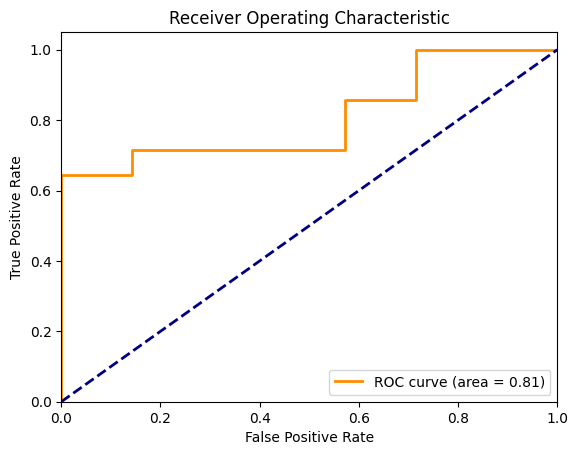

SCR-(0,4) PLI-(4,8)


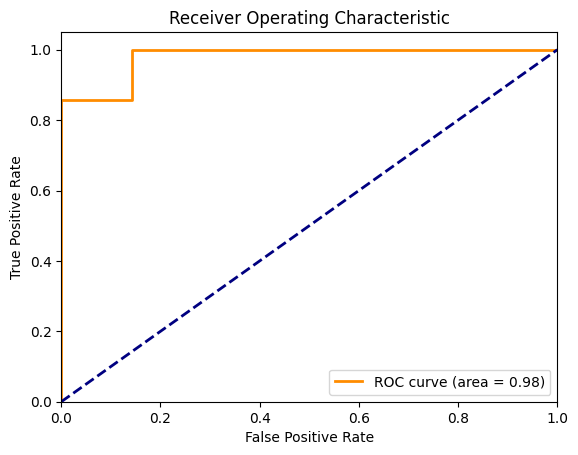

SCI-(0,4) PLI-(4,8)


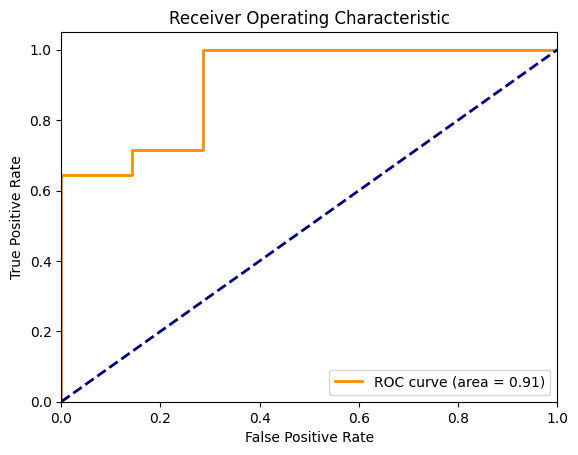

SCI-(0,4) SCR-(8,13)


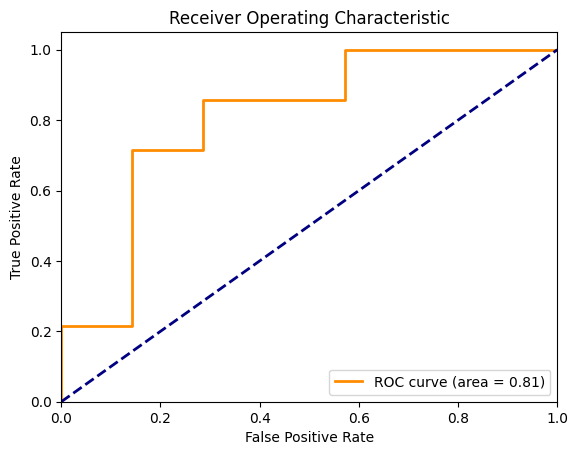

PLV-(0,4) PLI-(4,8)


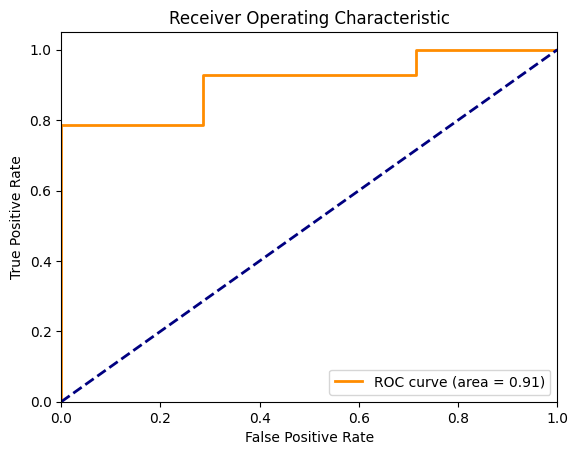

PLV-(4,8) PLI-(4,8)


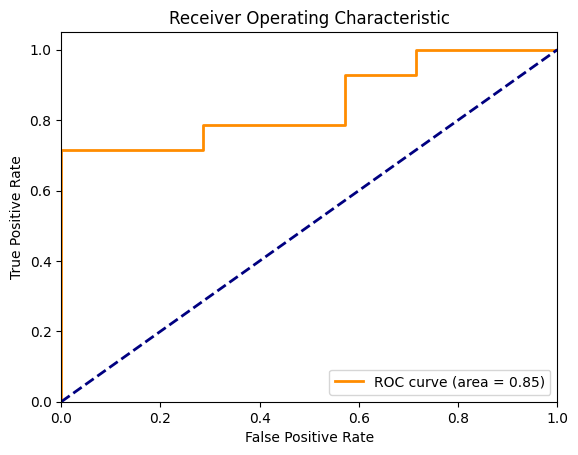

PLI-(4,8) CC-(4,8)


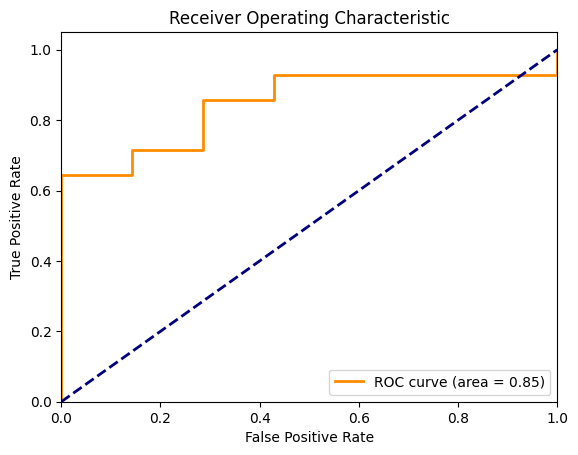

PLI-(4,8) SCR-(8,13)


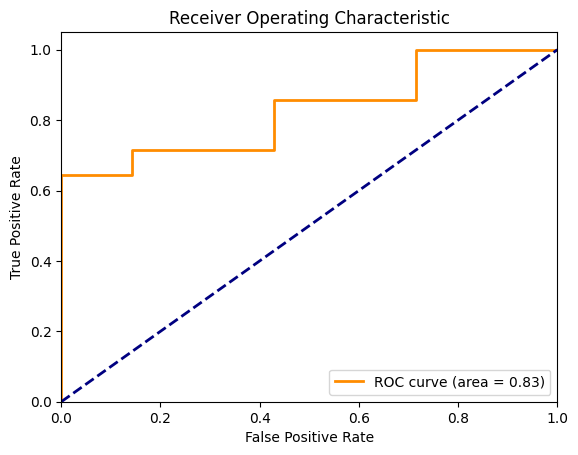

PLI-(4,8) PLI-(8,13)


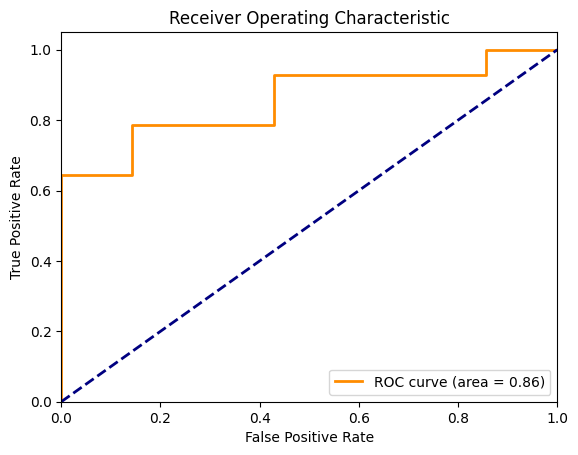

PLI-(4,8) PLV-(13,30)


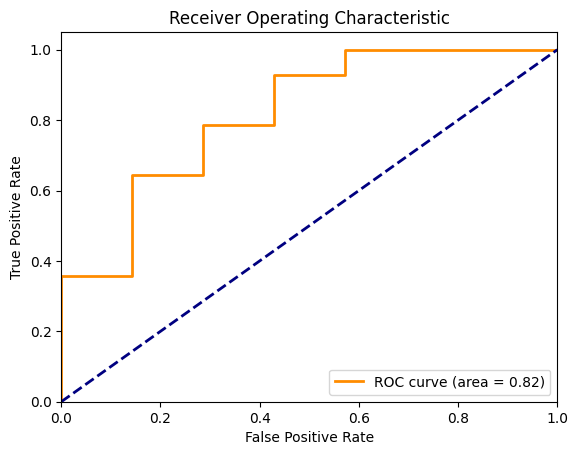

PLI-(4,8) SCR-(30,70)


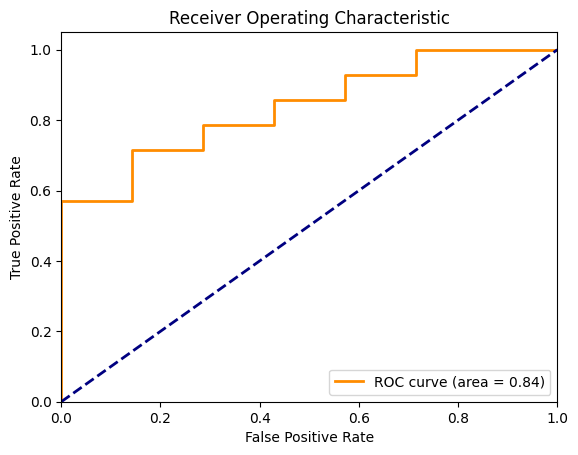

PLI-(4,8) SCI-(30,70)


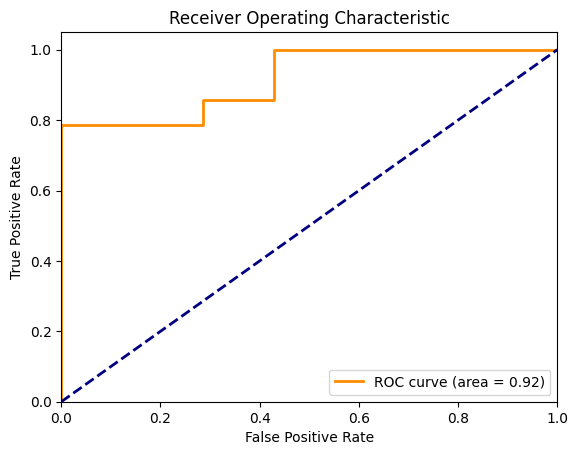

PLI-(4,8) CC-(30,70)


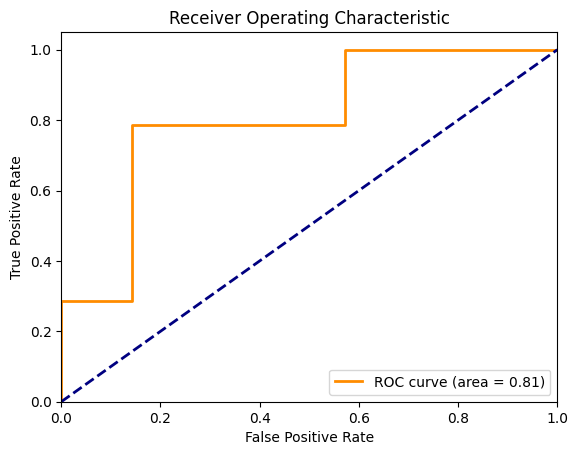

PLI-(4,8) PLI-(70,150)


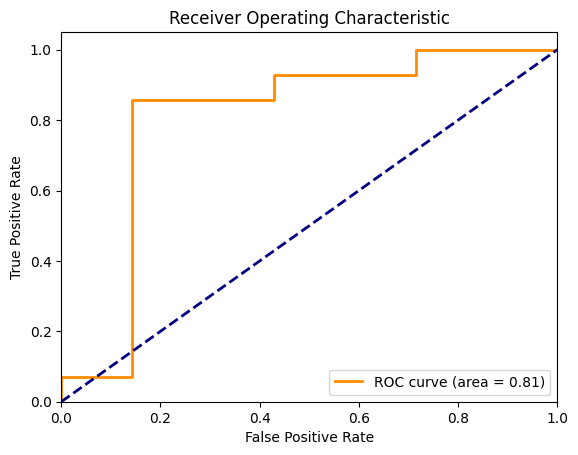

In [17]:
for cm in combinations(conn_measures, 2): # combinations of scores based on different connectivity measures
    cm1,cm2 = cm[0],cm[1]

    data1 = load_data.groupby("CM").get_group(cm1).groupby("Strategy").get_group(summary_stat)
    data2 = load_data.groupby("CM").get_group(cm2).groupby("Strategy").get_group(summary_stat)

    # the combination is made as a mean value between two scores
    x_plot = [np.mean([val, list(data2.Mean_overlap_ratio)[i]]) for i,val in enumerate(data1.Mean_overlap_ratio)]
    y_plot = list(data1.Outcome)

    scores, actual_labels = x_plot, y_plot

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(actual_labels, scores)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Print the AUC
    # print(f'The AUC is: {roc_auc}')

    if roc_auc > 0.8:
      # Plot the ROC curve
      print(cm1,cm2)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic')
      plt.legend(loc="lower right")
      plt.show()

Combinations of 3 connectivity measures.

SCR-(0,4) SCI-(0,4) PLI-(4,8)


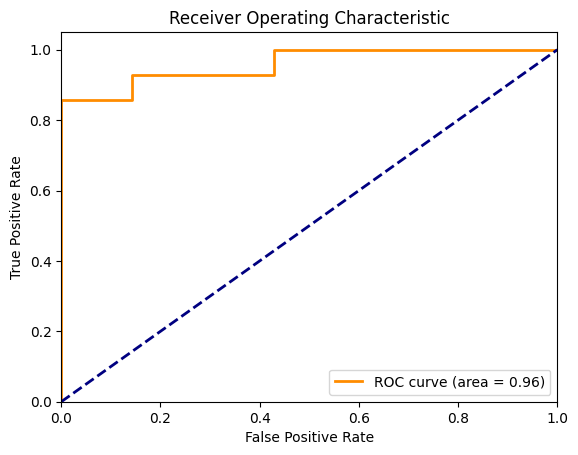

SCR-(0,4) PLV-(0,4) PLI-(4,8)


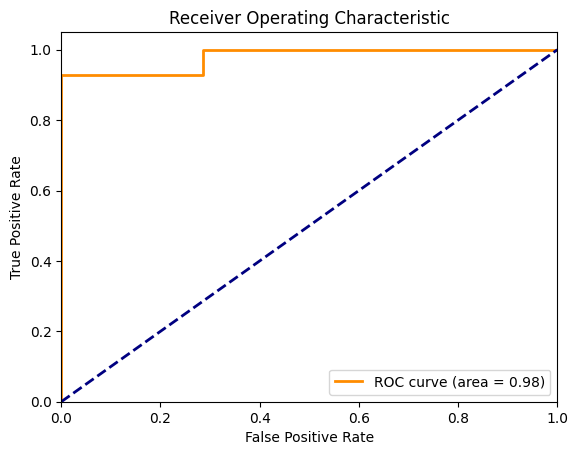

SCR-(0,4) PLV-(4,8) PLI-(4,8)


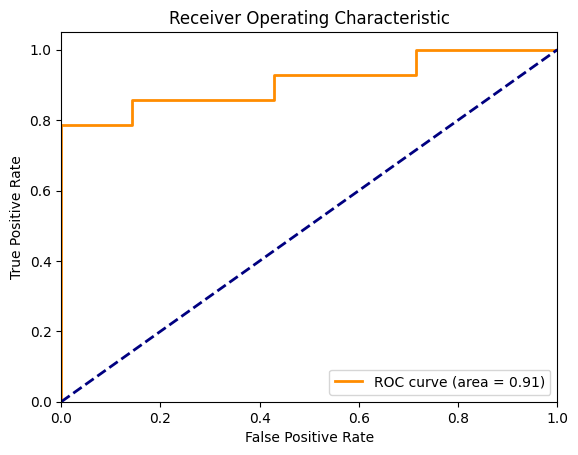

SCR-(0,4) PLI-(4,8) PLI-(8,13)


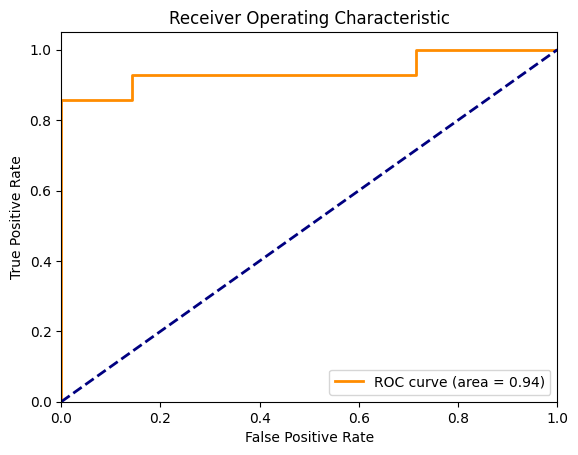

SCR-(0,4) PLI-(4,8) SCI-(30,70)


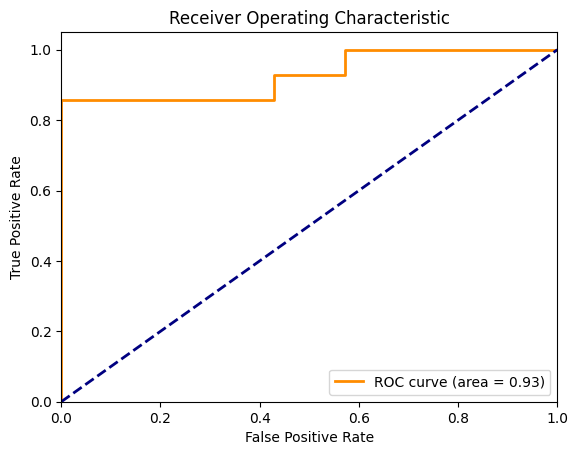

SCI-(0,4) PLV-(0,4) PLI-(4,8)


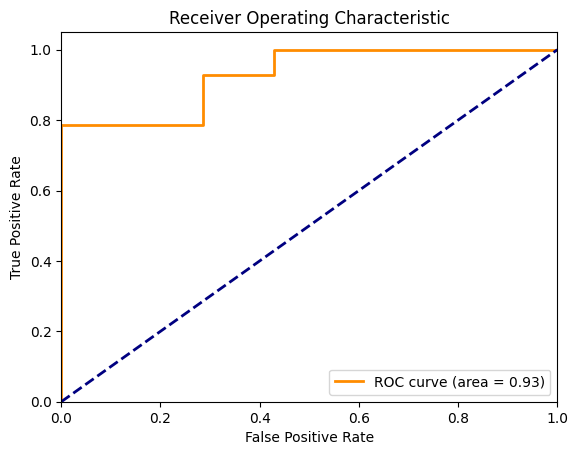

SCI-(0,4) PLI-(4,8) SCR-(13,30)


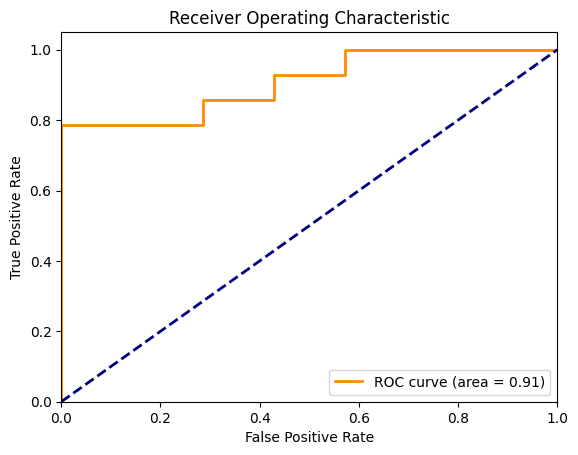

SCI-(0,4) PLI-(4,8) PLV-(13,30)


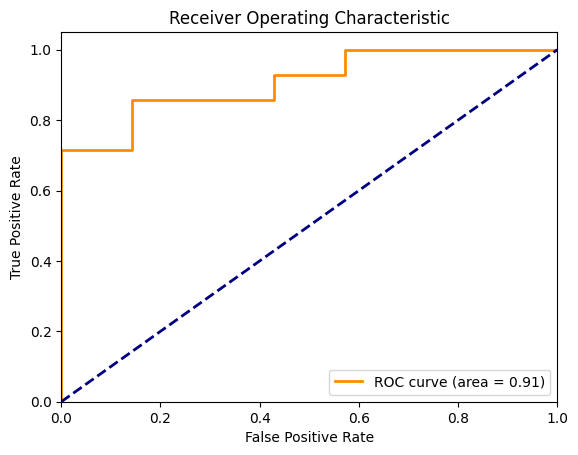

SCI-(0,4) PLI-(4,8) SCR-(30,70)


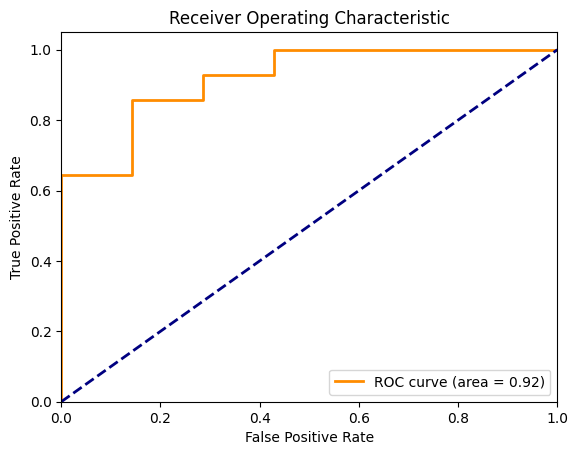

SCI-(0,4) PLI-(4,8) SCI-(30,70)


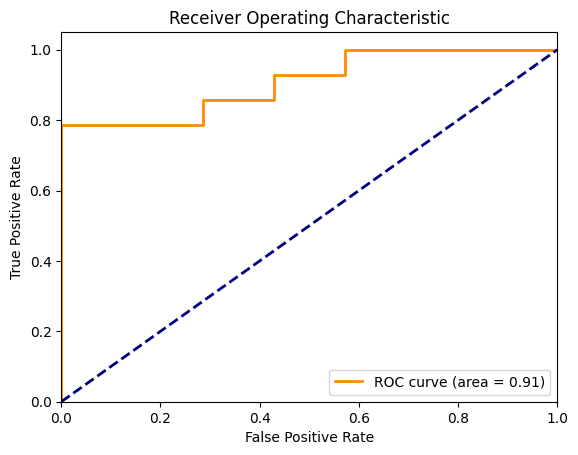

SCI-(0,4) PLI-(4,8) CC-(30,70)


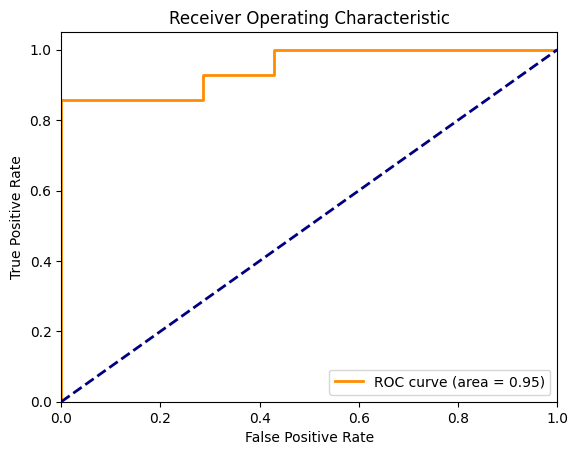

PLV-(0,4) PLI-(4,8) PLI-(8,13)


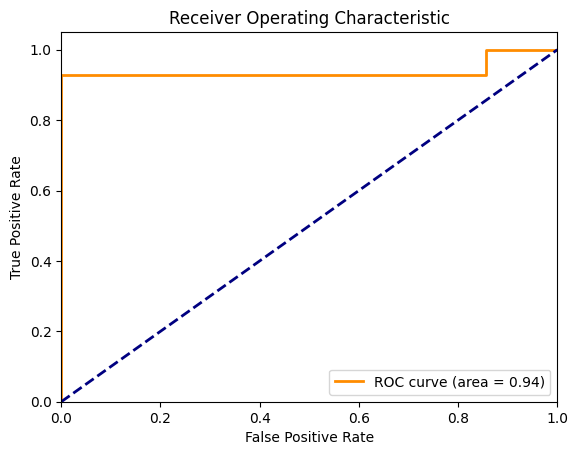

PLV-(0,4) PLI-(4,8) SCR-(13,30)


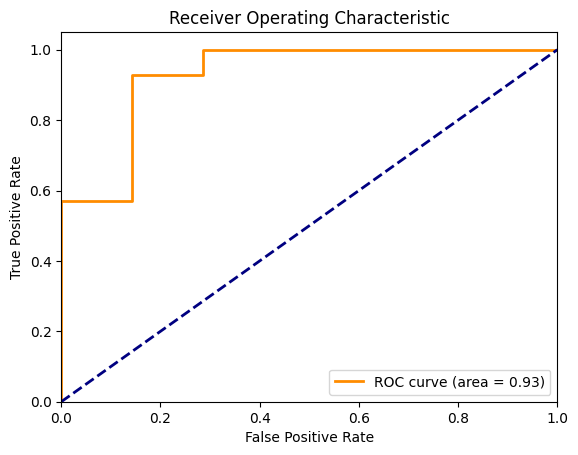

PLV-(0,4) PLI-(4,8) SCI-(30,70)


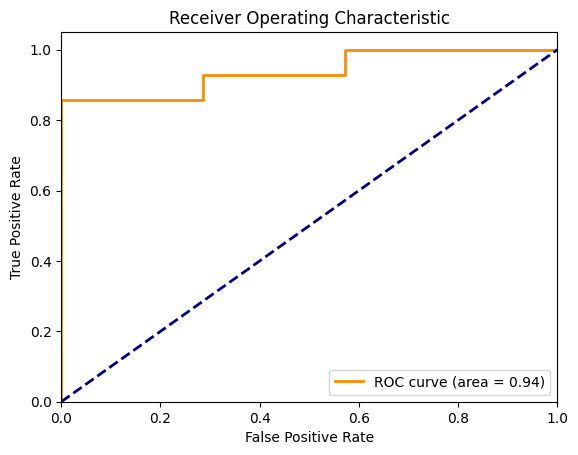

PLI-(4,8) PLI-(8,13) PLV-(13,30)


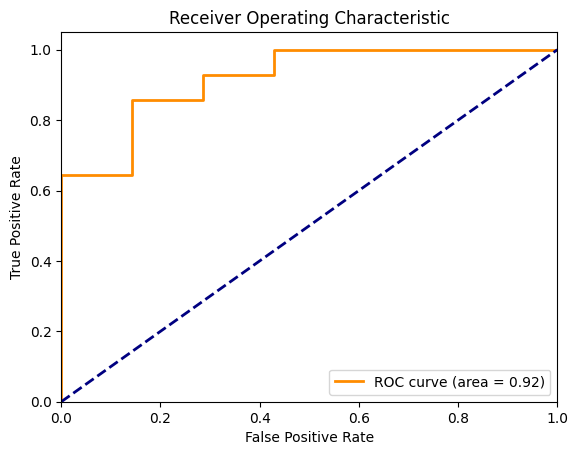

PLI-(4,8) PLI-(8,13) CC-(30,70)


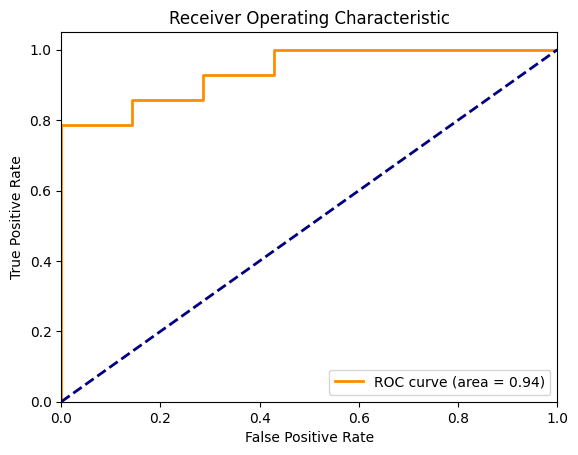

In [20]:
for cm in combinations(conn_measures, 3): # combinations of scores based on different connectivity measures
    cm1,cm2,cm3 = cm[0],cm[1],cm[2]
    data1 = load_data.groupby("CM").get_group(cm1).groupby("Strategy").get_group(summary_stat)
    data2 = load_data.groupby("CM").get_group(cm2).groupby("Strategy").get_group(summary_stat)
    data3 = load_data.groupby("CM").get_group(cm3).groupby("Strategy").get_group(summary_stat)

    # the combination is made as a mean value between two scores
    x_plot = [np.mean([val, list(data2.Mean_overlap_ratio)[i], list(data3.Mean_overlap_ratio)[i]]) for i,val in enumerate(data1.Mean_overlap_ratio)]
    y_plot = list(data1.Outcome)

    scores, actual_labels = x_plot, y_plot

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(actual_labels, scores)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Print the AUC
    # print(f'The AUC is: {roc_auc}')

    if roc_auc > 0.9:
      # Plot the ROC curve
      print(cm1,cm2,cm3)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic')
      plt.legend(loc="lower right")
      plt.show()
